**Angel Isai Ramirez Bazan**

# Modelo inicial

---



In [1]:
%tensorflow_version 2.x
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

print(tf.__version__)

import tensorflow_addons as tfa

2.3.0


In [ ]:
filename = "https://drive.google.com/uc?id=11k5uTqY3guUGrEvQN5f6r4xcue37ml7W&export=download"
csv_data= pd.read_csv(filename, sep=",")

#no acepta campos de tipo String
clean_data= csv_data.dropna()
norm_data = (clean_data-clean_data.min())/(clean_data.max()-clean_data.min()) 

print(norm_data.describe())

In [ ]:
print(clean_data.describe())

In [ ]:
#----------TRAIN/TEST SPLIT 
train_data = norm_data.sample(frac=0.8) # take 80% randomly from the data for training
test_data = norm_data.drop(train_data.index) # reserve the rest for testing

# separate out the y (results) from x (features)
x_train = train_data.drop('registered', axis=1)
y_train = train_data['registered']

# separate out the y (results) from x (features)
x_test = test_data.drop('registered', axis=1)
y_test = test_data['registered']

print('Training Data\n', x_train.describe().transpose())
print('Test Data\n', x_test.describe().transpose())

In [24]:
print(len(x_train.keys()))

14


In [25]:
num_params = len(x_train.keys())
print(num_params)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer([num_params], name="Input_Layer"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_01"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_02"),
    # 1 node in the output for the median_house_vale
    tf.keras.layers.Dense(1, name="Output_Layer")
  ])

learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate),
              # loss function to minimize
              loss='mse',
              # list of metrics to monitor
              metrics=['mae',])

model.summary()

14
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_01 (Dense)             (None, 32)                480       
_________________________________________________________________
dense_02 (Dense)             (None, 32)                1056      
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 33        
Total params: 1,569
Trainable params: 1,569
Non-trainable params: 0
_________________________________________________________________


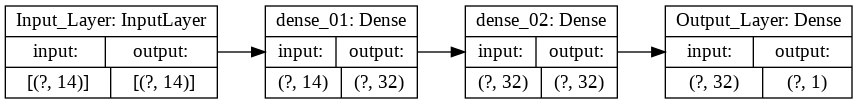

In [26]:
tf.keras.utils.plot_model(
    model,
    to_file ="model1.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=True,
    dpi=96,
)

In [27]:
# Fit/Train model on training data
history = model.fit(x_train, y_train,
                    batch_size=16,
                    epochs=15,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/25
30/30 [==============================] - 0s 6ms/step - loss: 0.0833 - mae: 0.2119 - val_loss: 0.0170 - val_mae: 0.1091
Epoch 2/25
30/30 [==============================] - 0s 2ms/step - loss: 0.0155 - mae: 0.0950 - val_loss: 0.0075 - val_mae: 0.0701
Epoch 3/25
30/30 [==============================] - 0s 2ms/step - loss: 0.0097 - mae: 0.0744 - val_loss: 0.0076 - val_mae: 0.0706
Epoch 4/25
30/30 [==============================] - 0s 2ms/step - loss: 0.0073 - mae: 0.0635 - val_loss: 0.0077 - val_mae: 0.0696
Epoch 5/25
30/30 [==============================] - 0s 2ms/step - loss: 0.0064 - mae: 0.0602 - val_loss: 0.0043 - val_mae: 0.0519
Epoch 6/25
30/30 [==============================] - 0s 2ms/step - loss: 0.0057 - mae: 0.0572 - val_loss: 0.0059 - val_mae: 0.0599
Epoch 7/25
30/30 [==============================] - 0s 2ms/step - loss: 0.0048 - mae: 0.0515 - val_loss: 0.0045 - val_mae: 0.0521
Epoch 8/25
30/30 [==============================] - 0s 2ms/step - loss: 0.0045 - mae: 0.05

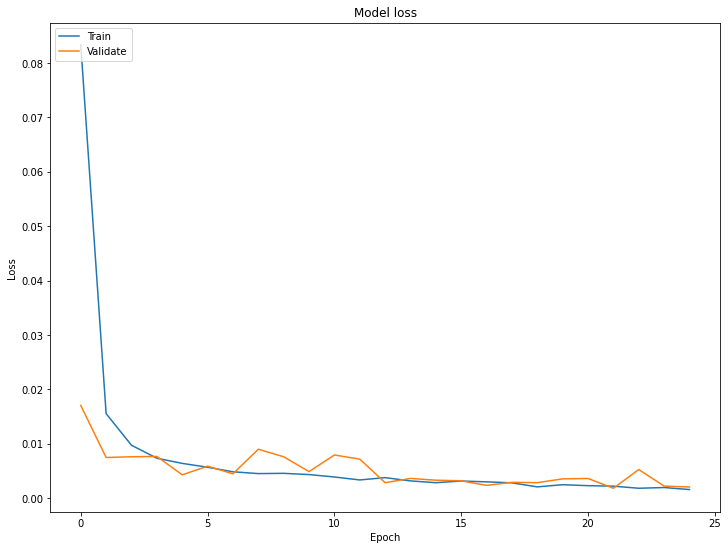

In [28]:
#--------MONITOR
# Plot training & validation loss values
fig = plt.figure(figsize=(12,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [35]:
 #--------EVALUATE
loss, mae = model.evaluate(x_test, y_test, verbose=2)
print('Loss:', loss, 'MAE:', mae)

5/5 - 0s - loss: 0.0011 - mae: 0.0222
Loss: 0.0010518832132220268 MAE: 0.022165575996041298


In [34]:
p_test = model.predict(x_test)

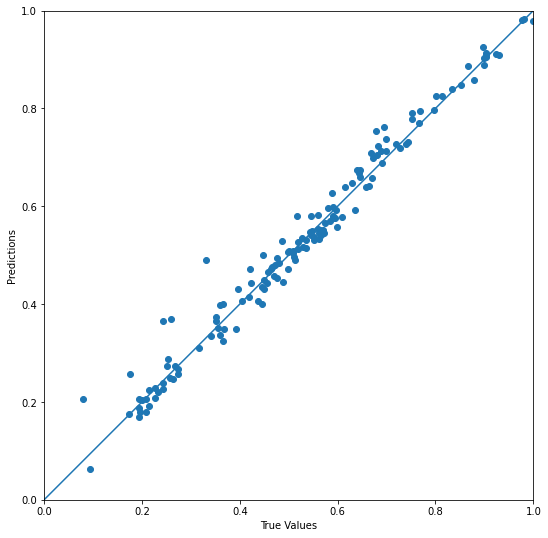

In [36]:
#----------PLOT True Values vs. Predictions
fig = plt.figure(figsize=(9,9))
a = plt.axes(aspect='equal')
plt.scatter(y_test, p_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
# draw a diagonal line for comparison
plt.plot(lims, lims)
plt.show()

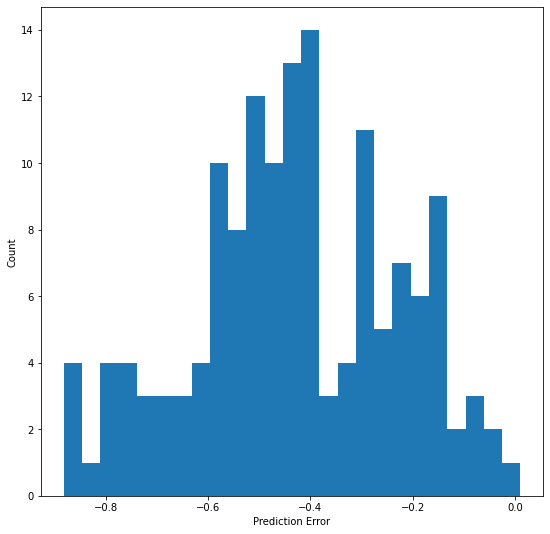

In [31]:
fig = plt.figure(figsize=(9,9))
error = p_test.flatten() - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.show()

# **Homework**

7 ejercicios 

Increase / decrease number of epochs

In [ ]:
#Decrease

history = model.fit(x_train, y_train,
                    batch_size=16,
                    epochs=5,             # here is the modification 
                    validation_split=0.2,
                    verbose=1)

fig = plt.figure(figsize=(12,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()
 #--------EVALUATE
loss, mae = model.evaluate(x_test, y_test, verbose=2)
print('Loss:', loss, 'MAE:', mae)
p_test = model.predict(x_test)
#----------PLOT True Values vs. Predictions
fig = plt.figure(figsize=(9,9))
a = plt.axes(aspect='equal')
plt.scatter(y_test, p_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
# draw a diagonal line for comparison
plt.plot(lims, lims)
plt.show()

In [ ]:
#Increase


history = model.fit(x_train, y_train,
                    batch_size=16,
                    epochs=40,             # here is the modification 
                    validation_split=0.2,
                    verbose=1)

fig = plt.figure(figsize=(12,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()
 #--------EVALUATE
loss, mae = model.evaluate(x_test, y_test, verbose=2)
print('Loss:', loss, 'MAE:', mae)
p_test = model.predict(x_test)
#----------PLOT True Values vs. Predictions
fig = plt.figure(figsize=(9,9))
a = plt.axes(aspect='equal')
plt.scatter(y_test, p_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
# draw a diagonal line for comparison
plt.plot(lims, lims)
plt.show()

try different batch sizes : 16

In [ ]:
#Increase


history = model.fit(x_train, y_train,
                    batch_size=50,    # here is the modification 
                    #  entre mas pequeno el batch_size mas tarda en entrenar 
                    epochs=25,            
                    validation_split=0.2,
                    verbose=1)

fig = plt.figure(figsize=(12,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()
 #--------EVALUATE
loss, mae = model.evaluate(x_test, y_test, verbose=2)
print('Loss:', loss, 'MAE:', mae)
p_test = model.predict(x_test)
#----------PLOT True Values vs. Predictions
fig = plt.figure(figsize=(9,9))
a = plt.axes(aspect='equal')
plt.scatter(y_test, p_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
# draw a diagonal line for comparison
plt.plot(lims, lims)
plt.show()

try the different learning rates

In [ ]:
num_params = len(x_train.keys())
print(num_params)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer([num_params], name="Input_Layer"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_01"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_02"),
    
    tf.keras.layers.Dense(1, name="Output_Layer")
  ])

learning_rate = 0.000001                                                      # here is the modification
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate),
             
              loss='mse',
              
              metrics=['mae',])

model.summary()
history = model.fit(x_train, y_train,
                    batch_size=16,   
                    epochs=25,            
                    validation_split=0.2,
                    verbose=1)

fig = plt.figure(figsize=(12,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()
 #--------EVALUATE
loss, mae = model.evaluate(x_test, y_test, verbose=2)
print('Loss:', loss, 'MAE:', mae)
p_test = model.predict(x_test)
#----------PLOT True Values vs. Predictions
fig = plt.figure(figsize=(9,9))
a = plt.axes(aspect='equal')
plt.scatter(y_test, p_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
# draw a diagonal line for comparison
plt.plot(lims, lims)
plt.show()

try different optimizers

In [ ]:

num_params = len(x_train.keys())
print(num_params)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer([num_params], name="Input_Layer"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_01"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_02"),
    
    tf.keras.layers.Dense(1, name="Output_Layer")
  ])

learning_rate = 0.01                                                    
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),  # here is the modification   .Adam
             
              loss='mse',
              
              metrics=['mae',])

model.summary()
history = model.fit(x_train, y_train,
                    batch_size=16,   
                    epochs=25,            
                    validation_split=0.2,
                    verbose=1)

fig = plt.figure(figsize=(12,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()
 #--------EVALUATE
loss, mae = model.evaluate(x_test, y_test, verbose=2)
print('Loss:', loss, 'MAE:', mae)
p_test = model.predict(x_test)
#----------PLOT True Values vs. Predictions
fig = plt.figure(figsize=(9,9))
a = plt.axes(aspect='equal')
plt.scatter(y_test, p_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
# draw a diagonal line for comparison
plt.plot(lims, lims)
plt.show()

try different loss functions 

In [ ]:
num_params = len(x_train.keys())
print(num_params)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer([num_params], name="Input_Layer"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_01"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_02"),
    
    tf.keras.layers.Dense(1, name="Output_Layer")
  ])

learning_rate = 0.01                                                    
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),  
             
              loss='mae',
                              # here is the modification  
              metrics=['mse',])

model.summary()
history = model.fit(x_train, y_train,
                    batch_size=16,   
                    epochs=25,            
                    validation_split=0.2,
                    verbose=1)

fig = plt.figure(figsize=(12,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()
 #--------EVALUATE
loss, mae = model.evaluate(x_test, y_test, verbose=2)
print('Loss:', loss, 'MAE:', mae)
p_test = model.predict(x_test)
#----------PLOT True Values vs. Predictions
fig = plt.figure(figsize=(9,9))
a = plt.axes(aspect='equal')
plt.scatter(y_test, p_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
# draw a diagonal line for comparison
plt.plot(lims, lims)
plt.show()

make the network deeper (more layers) or denser (more nodes/layer)

14
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_01 (Dense)             (None, 32)                480       
_________________________________________________________________
dense_02 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_03 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_04 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_05 (Dense)             (None, 32)                1056      
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 33        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
________________________________________________

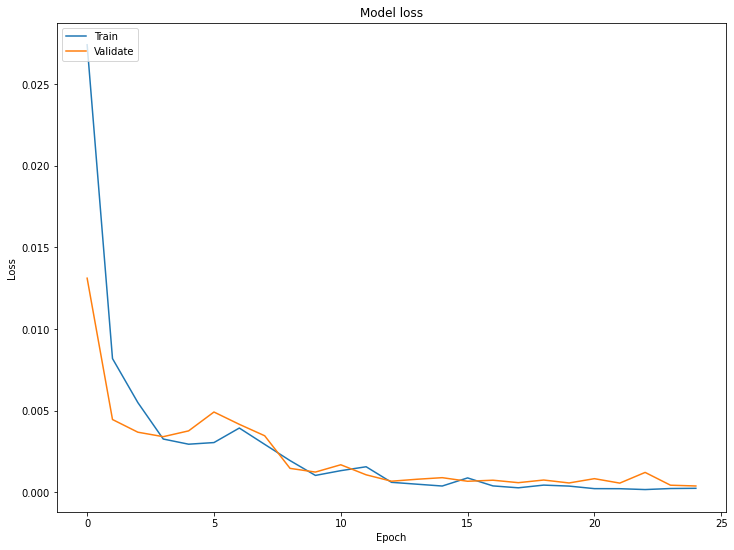

5/5 - 0s - loss: 2.6281e-04 - mae: 0.0116
Loss: 0.0002628123911563307 MAE: 0.011595452204346657


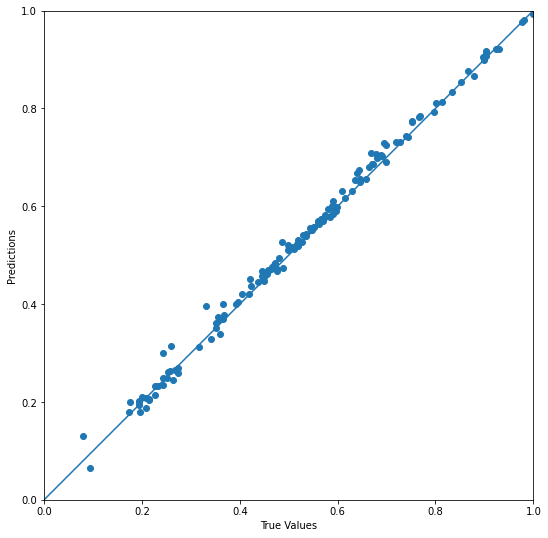

In [58]:
num_params = len(x_train.keys())
print(num_params)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer([num_params], name="Input_Layer"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_01"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_02"),      # here is the modification 
    tf.keras.layers.Dense(32, activation='relu', name="dense_03"),      # here is the modification  
    tf.keras.layers.Dense(32, activation='relu', name="dense_04"),      # here is the modification 
    tf.keras.layers.Dense(32, activation='relu', name="dense_05"),
    tf.keras.layers.Dense(1, name="Output_Layer")
  ])

learning_rate = 0.01                                                    
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),  
             
              loss='mse',
                              
              metrics=['mae',])

model.summary()
history = model.fit(x_train, y_train,
                    batch_size=16,   
                    epochs=25,            
                    validation_split=0.2,
                    verbose=1)

fig = plt.figure(figsize=(12,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()
 #--------EVALUATE
loss, mae = model.evaluate(x_test, y_test, verbose=2)
print('Loss:', loss, 'MAE:', mae)
p_test = model.predict(x_test)
#----------PLOT True Values vs. Predictions
fig = plt.figure(figsize=(9,9))
a = plt.axes(aspect='equal')
plt.scatter(y_test, p_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
# draw a diagonal line for comparison
plt.plot(lims, lims)
plt.show()

**more nodes The best model** 







14
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_01 (Dense)             (None, 64)                960       
_________________________________________________________________
dense_02 (Dense)             (None, 62)                4030      
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 63        
Total params: 5,053
Trainable params: 5,053
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
30/30 [==============================] - 0s 6ms/step - loss: 0.0722 - mae: 0.1798 - val_loss: 0.0101 - val_mae: 0.0789
Epoch 2/25
30/30 [==============================] - 0s 2ms/step - loss: 0.0072 - mae: 0.0637 - val_loss: 0.0038 - val_mae: 0.0469
Epoch 3/25
30/30 [==============================] - 0s 2ms/step - loss: 0.0052 - mae: 0.0543 - val_loss: 0.0036 - val_

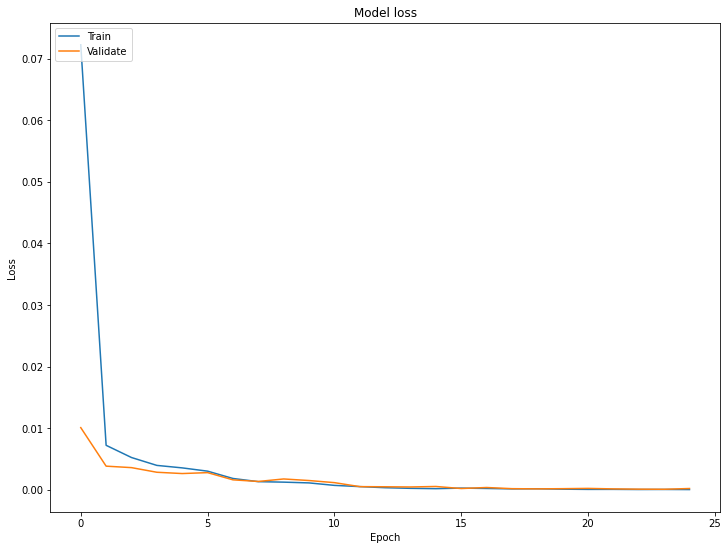

5/5 - 0s - loss: 1.9643e-04 - mae: 0.0118
Loss: 0.0001964262337423861 MAE: 0.011792297475039959


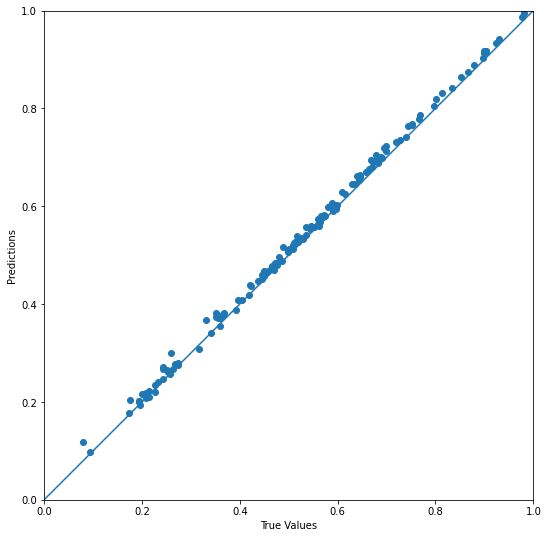

In [59]:
num_params = len(x_train.keys())
print(num_params)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer([num_params], name="Input_Layer"),
    tf.keras.layers.Dense(64, activation='relu', name="dense_01"),    # here is the modification  
    tf.keras.layers.Dense(62, activation='relu', name="dense_02"),     # here is the modification        
    tf.keras.layers.Dense(1, name="Output_Layer")
  ])

learning_rate = 0.01                                                    
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),  
             
              loss='mse',
                              
              metrics=['mae',])

model.summary()
history = model.fit(x_train, y_train,
                    batch_size=16,   
                    epochs=25,            
                    validation_split=0.2,
                    verbose=1)

fig = plt.figure(figsize=(12,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()
 #--------EVALUATE
loss, mae = model.evaluate(x_test, y_test, verbose=2)
print('Loss:', loss, 'MAE:', mae)
p_test = model.predict(x_test)
#----------PLOT True Values vs. Predictions
fig = plt.figure(figsize=(9,9))
a = plt.axes(aspect='equal')
plt.scatter(y_test, p_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
# draw a diagonal line for comparison
plt.plot(lims, lims)
plt.show()